In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 50)

In [3]:
doc = pd.read_csv(r'D:\Data Analysis\DA Projects\fintech-testcase\doc_reports_sample.csv')
face = pd.read_csv(r'D:\Data Analysis\DA Projects\fintech-testcase\face_reports_sample.csv')

In [4]:
df = doc.merge(face,how='inner',on=['user_id','attempt_id','Unnamed: 0'],suffixes=['_d','_f'])

In [5]:
df.shape

(5880, 25)

In [6]:
doc.shape + face.shape

(5880, 19, 5880, 9)

In [7]:
df.isna().mean().sort_values(ascending=False)

data_comparison_result                0.985544
compromised_document_result           0.740816
data_consistency_result               0.485544
conclusive_document_quality_result    0.465986
colour_picture_result                 0.465986
data_validation_result                0.194048
police_record_result                  0.185204
face_detection_result                 0.151361
visual_authenticity_result_d          0.151190
visual_authenticity_result_f          0.151190
face_comparison_result                0.058673
facial_image_integrity_result         0.003231
supported_document_result             0.001871
created_at_f                          0.000000
properties_d                          0.000000
result_f                              0.000000
sub_result                            0.000000
Unnamed: 0                            0.000000
attempt_id                            0.000000
user_id                               0.000000
created_at_d                          0.000000
image_quality

In [8]:
df.head()

,Unnamed: 0,user_id,result_d,visual_authenticity_result_d,image_integrity_result,face_detection_result,image_quality_result,created_at_d,supported_document_result,conclusive_document_quality_result,colour_picture_result,data_validation_result,data_consistency_result,data_comparison_result,attempt_id,police_record_result,compromised_document_result,properties_d,sub_result,result_f,face_comparison_result,created_at_f,facial_image_integrity_result,visual_authenticity_result_f,properties_f
0,27241,8190909e566647a5b6afeee9b4ec6c6a,clear,clear,clear,clear,clear,2017-05-25 08:38:56,clear,NaN,NaN,clear,NaN,clear,30e11e95e30748f485a2271ca5e6abb8,clear,NaN,"{'gender': 'Female', 'document_type': 'driving...",clear,consider,consider,2017-05-25 08:38:56,clear,clear,{'score': 0.42}
1,28369,6b62136dfde348a99855e350294aaf5d,clear,clear,clear,clear,clear,2017-05-31 08:12:51,clear,NaN,NaN,clear,NaN,clear,4c0bfde8eb2249ed820e1f61d3ec3e33,clear,NaN,"{'gender': 'Male', 'document_type': 'driving_l...",clear,clear,clear,2017-05-31 08:12:51,clear,clear,{'score': 0.61}
2,27988,73679363dccc46fa9f34a4fefd0d76e3,clear,clear,clear,clear,clear,2017-05-29 15:07:04,clear,NaN,NaN,clear,clear,clear,c5004fd1fc1d4e36a11433b70d960867,clear,NaN,"{'gender': 'Male', 'nationality': 'GBR', 'docu...",clear,consider,NaN,2017-05-29 15:07:04,consider,clear,{}
3,27529,07857065dfa64db386739ec4fff47856,consider,clear,clear,clear,clear,2017-05-26 19:00:35,clear,NaN,NaN,clear,clear,consider,e4b26d4ddda545c9931a0a845cd65109,clear,NaN,"{'gender': 'Male', 'nationality': 'PER', 'docu...",caution,clear,clear,2017-05-26 19:00:35,clear,clear,{'score': 0.65}
4,47987,9f887805b2af49069349ff107e0bca01,clear,clear,clear,clear,clear,2017-05-29 14:38:21,clear,NaN,NaN,clear,clear,clear,8ead2b23ef664e4d85fae798a7d5d52c,clear,NaN,"{'gender': 'Male', 'issuing_date': '2011-03', ...",clear,clear,clear,2017-05-29 14:38:21,clear,clear,{'score': 0.59}


In [9]:
df.dtypes

Unnamed: 0                             int64
user_id                               object
result_d                              object
visual_authenticity_result_d          object
image_integrity_result                object
face_detection_result                 object
image_quality_result                  object
created_at_d                          object
supported_document_result             object
conclusive_document_quality_result    object
colour_picture_result                 object
data_validation_result                object
data_consistency_result               object
data_comparison_result                object
attempt_id                            object
police_record_result                  object
compromised_document_result           object
properties_d                          object
sub_result                            object
result_f                              object
face_comparison_result                object
created_at_f                          object
facial_ima

In [10]:
df['created_at_d'] = pd.to_datetime(df['created_at_d'], format='%Y-%m-%d %H:%M:%S')

In [11]:
df['created_at_f'] = pd.to_datetime(df['created_at_f'], format='%Y-%m-%d %H:%M:%S')

In [12]:
df['user_id'].agg(['count','nunique'])

count      5880
nunique    5848
Name: user_id, dtype: int64

In [13]:
# The number of attempts each user made to pass verification
df['user_id'].value_counts()

12028371d6c943babadf18224ebe96cb    2
67a943369bbc48e187c3a07b35302f65    2
b6f9bdc46bb543bab45e6c34e850adf7    2
2e98fa65f2fe4d76a1ff0f30bd4048a9    2
0b3fe48a14554fa687e5152a1c20d768    2
                                   ..
61ebe1797db7451ca218573ed2da41a1    1
2e3b8deec6914a81be669462dc2bc82c    1
a3c7ba928024419dbece61de8824c66e    1
ded4e9772ac94f48b2c93c93b04ea8ae    1
be89b841eda0429999a6fa4cee5c29a9    1
Name: user_id, Length: 5848, dtype: int64

In [14]:
# Create user_id list of all users who made two attempts to pass customer verification (two is the max number of tries)
two_attempts = (df['user_id'].value_counts().to_frame().reset_index().query('user_id > 1')
                .rename(columns={'user_id': 'n_attemps', 'index':'user_id'})['user_id'])

In [15]:
two_attempts

0     12028371d6c943babadf18224ebe96cb
1     67a943369bbc48e187c3a07b35302f65
2     b6f9bdc46bb543bab45e6c34e850adf7
3     2e98fa65f2fe4d76a1ff0f30bd4048a9
4     0b3fe48a14554fa687e5152a1c20d768
5     f218379dd76b4058958450cb9aaea143
6     0a743f7f87884a51bd8c165e0d3e70ed
7     176a83a802e04eb8b36e7c69731aeda4
8     1b7a0094e1174512a16f36885aaf5187
9     76e5f56153ee4fbdb80372e2a6425622
10    d05a9ec2f1a54c03942b6fc9fd6b44cc
11    5ccac3c8cb00411e86ef8ebf41e8c86d
12    0b677d16a072467eb95dd396e25840d9
13    b3b7554c4ea443758809912ef11b525c
14    c835775c51f347868c15198f7f7ee9d5
15    730ef3d0916747ba98d6b5ab150fdbec
16    cb300e2235c848598e410662c71d51d6
17    54c536e2b4894a88a0cc42c156548e1f
18    e1419879e0f948a191bc3a9ea90e0fdd
19    9a2239187ebb404c9765c6867f4270a5
20    932a394bb5754565b221af3c7e51c11e
21    aac901afba47473a8302fa7493f2f121
22    a7661341ef9d4852bc72d1fc38bec51d
23    527691d1867747d58a9357421f61a2b1
24    6a556fd0048b4912b5a3a8a9b61a41ba
25    bfc44280c2fd4ba7a57

In [16]:
# Create a list of all first attempt_id's of those users who had two attempts
first_attempt = df[df['user_id'].isin(two_attempts)].sort_values(['user_id','created_at_d']).iloc[::2]['attempt_id']

In [17]:
# Exclude first attempts of all users with two attempts
df = df[~df['attempt_id'].isin(first_attempt)].copy()

In [18]:
df['user_id'].agg(['count', 'nunique'])

count      5848
nunique    5848
Name: user_id, dtype: int64

In [19]:
df.columns

Index(['Unnamed: 0', 'user_id', 'result_d', 'visual_authenticity_result_d',
       'image_integrity_result', 'face_detection_result',
       'image_quality_result', 'created_at_d', 'supported_document_result',
       'conclusive_document_quality_result', 'colour_picture_result',
       'data_validation_result', 'data_consistency_result',
       'data_comparison_result', 'attempt_id', 'police_record_result',
       'compromised_document_result', 'properties_d', 'sub_result', 'result_f',
       'face_comparison_result', 'created_at_f',
       'facial_image_integrity_result', 'visual_authenticity_result_f',
       'properties_f'],
      dtype='object')

`result_d` and `result_f` are variables that indicate passed document and face verifications. *Clear* — all underlying verifications passed, *consider* — the report has returned information that needs to be evaluated. I replace all instances of *clear* with 1, and *consider* with 0, and create a new variable, `result`, where 1 indicates that the customer passed both `result_d` and `result_f` checks.

In [20]:
di = {'clear': 1, "consider": 0}
df.replace(di, inplace=True)

In [21]:
df['result'] = df['result_d'] * df['result_f']

In [22]:
df['result'].value_counts()

1    4227
0    1621
Name: result, dtype: int64

To add a new variable, `month`, I'll use `created_at_d` because it's essentially equal to `created_at_f`; the largest discrepancy between those is 1 second.

In [23]:
df['month'] = df['created_at_d'].values.astype('datetime64[M]')

Calculating monthly pass rate:

In [24]:
df.groupby('month')['result'].agg(['count','mean'])

,count,mean
month,,
2017-05-01,58,0.827586
2017-06-01,273,0.912088
2017-07-01,1128,0.846631
2017-08-01,1223,0.792314
2017-09-01,1243,0.701529
2017-10-01,1923,0.589704


Pass rate dropped from 91% in June to 59% in October.

In [25]:
df.columns

Index(['Unnamed: 0', 'user_id', 'result_d', 'visual_authenticity_result_d',
       'image_integrity_result', 'face_detection_result',
       'image_quality_result', 'created_at_d', 'supported_document_result',
       'conclusive_document_quality_result', 'colour_picture_result',
       'data_validation_result', 'data_consistency_result',
       'data_comparison_result', 'attempt_id', 'police_record_result',
       'compromised_document_result', 'properties_d', 'sub_result', 'result_f',
       'face_comparison_result', 'created_at_f',
       'facial_image_integrity_result', 'visual_authenticity_result_f',
       'properties_f', 'result', 'month'],
      dtype='object')

In [26]:
df.groupby('month')[['result_d', 'visual_authenticity_result_d',
       'image_integrity_result', 'face_detection_result',
       'image_quality_result', 'supported_document_result',
       'conclusive_document_quality_result', 'colour_picture_result',
       'data_validation_result', 'data_consistency_result',
       'data_comparison_result', 'police_record_result',
       'compromised_document_result', 'sub_result', 'result_f',
       'face_comparison_result', 'created_at_f',
       'facial_image_integrity_result', 'visual_authenticity_result_f',
        'result']].agg(['count','mean'])

C:\Users\John\AppData\Local\Temp\ipykernel_1456\2234900821.py:10: FutureWarning: ['image_quality_result', 'supported_document_result', 'sub_result'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  'result']].agg(['count','mean'])


result_d           visual_authenticity_result_d            \
              count      mean                        count      mean   
month                                                                  
2017-05-01       58  0.965517                           58  1.000000   
2017-06-01      273  0.970696                          272  0.992647   
2017-07-01     1128  0.894504                         1032  0.983527   
2017-08-01     1223  0.830744                         1061  0.973610   
2017-09-01     1243  0.723250                         1029  0.979592   
2017-10-01     1923  0.599064                         1520  0.982895   

           image_integrity_result           face_detection_result            \
                            count      mean                 count      mean   
month                                                                         
2017-05-01                     58  1.000000                    58  1.000000   
2017-06-01                    273  0.996337                   272  1.000000   
2017-07-01                   1128  0.914894                  1032  1.000000   
2017-08-01                   1223  0.857727                  1061  0.993402   
2017-09-01                   1243  0.746581                  1028  0.991245   
2017-10-01                   1923  0.619865                  1520  0.996053   

           conclusive_document_quality_result           colour_picture_result  \
                                        count      mean                 count   
month                                                                           
2017-05-01                                  0       NaN                     0   
2017-06-01                                  0       NaN                     0   
2017-07-01                                  0       NaN                     0   
2017-08-01                                581  0.982788                   581   
2017-09-01                               1029  0.901846                  1029   
2017-10-01                               1520  0.784211                  1520   

                     data_validation_result           data_consistency_result  \
                mean                  count      mean                   count   
month                                                                           
2017-05-01       NaN                     51  1.000000                      32   
2017-06-01       NaN                    255  0.988235                     161   
2017-07-01       NaN                    979  0.991828                     617   
2017-08-01  0.996558                   1009  0.991080                     675   
2017-09-01  1.000000                    977  0.983623                     643   
2017-10-01  1.000000                   1451  0.986906                     886   

                     data_comparison_result           police_record_result  \
                mean                  count      mean                count   
month                                                                        
2017-05-01  1.000000                     58  0.965517                   49   
2017-06-01  1.000000                     27  0.888889                  235   
2017-07-01  0.998379                      0       NaN                 1003   
2017-08-01  0.998519                      0       NaN                 1024   
2017-09-01  1.000000                      0       NaN                  982   
2017-10-01  0.997743                      0       NaN                 1480   

                compromised_document_result      result_f            \
           mean                       count mean    count      mean   
month                                                                 
2017-05-01  1.0                           0  NaN       58  0.862069   
2017-06-01  1.0                           0  NaN      273  0.937729   
2017-07-01  1.0                           0  NaN     1128  0.915780   
2017-08-01  1.0                           0  NaN     1223  0.

Some columns didn't aggreagate properly, exploring and fixing:

In [27]:
df['image_quality_result'].value_counts()

1               5027
unidentified     821
Name: image_quality_result, dtype: int64

In [28]:
df['supported_document_result'].value_counts()

1               5782
unidentified      55
Name: supported_document_result, dtype: int64

In [29]:
df['sub_result'].value_counts()

1            4397
rejected      876
caution       516
suspected      59
Name: sub_result, dtype: int64

In [30]:
df.replace('unidentified', 0, inplace=True)

In [31]:
df['image_quality_result'].value_counts()

1    5027
0     821
Name: image_quality_result, dtype: int64

In [32]:
df['supported_document_result'].value_counts()

1.0    5782
0.0      55
Name: supported_document_result, dtype: int64

In [33]:
di = {'rejected': 0, "caution": 0, "suspected": 0}
df['sub_result_num'] = df['sub_result'].replace(di)

In [34]:
df['sub_result_num'].value_counts()

1    4397
0    1451
Name: sub_result_num, dtype: int64

I aggregate data by month once again, excluding all variables where mean values don't change significantly from month to month:

In [35]:
df.groupby('month')[['result', 'result_d', 'result_f',
                     'image_integrity_result', 'image_quality_result',
                     'conclusive_document_quality_result', 'colour_picture_result',
                     'data_comparison_result', 'police_record_result',
                     'compromised_document_result', 'sub_result_num',
                     'facial_image_integrity_result']].agg(['count','mean'])

result           result_d           result_f            \
            count      mean    count      mean    count      mean   
month                                                               
2017-05-01     58  0.827586       58  0.965517       58  0.862069   
2017-06-01    273  0.912088      273  0.970696      273  0.937729   
2017-07-01   1128  0.846631     1128  0.894504     1128  0.915780   
2017-08-01   1223  0.792314     1223  0.830744     1223  0.921504   
2017-09-01   1243  0.701529     1243  0.723250     1243  0.935640   
2017-10-01   1923  0.589704     1923  0.599064     1923  0.966199   

           image_integrity_result           image_quality_result            \
                            count      mean                count      mean   
month                                                                        
2017-05-01                     58  1.000000                   58  1.000000   
2017-06-01                    273  0.996337                  273  0.996337   
2017-07-01                   1128  0.914894                 1128  0.924645   
2017-08-01                   1223  0.857727                 1223  0.881439   
2017-09-01                   1243  0.746581                 1243  0.835881   
2017-10-01                   1923  0.619865                 1923  0.799272   

           conclusive_document_quality_result           colour_picture_result  \
                                        count      mean                 count   
month                                                                           
2017-05-01                                  0       NaN                     0   
2017-06-01                                  0       NaN                     0   
2017-07-01                                  0       NaN                     0   
2017-08-01                                581  0.982788                   581   
2017-09-01                               1029  0.901846                  1029   
2017-10-01                               1520  0.784211                  1520   

                     data_comparison_result           police_record_result  \
                mean                  count      mean                count   
month                                                                        
2017-05-01       NaN                     58  0.965517                   49   
2017-06-01       NaN                     27  0.888889                  235   
2017-07-01       NaN                      0       NaN                 1003   
2017-08-01  0.996558                      0       NaN                 1024   
2017-09-01  1.000000                      0       NaN                  982   
2017-10-01  1.000000                      0       NaN                 1480   

                compromised_document_result      sub_result_num            \
           mean                       count mean          count      mean   
month                                                                       
2017-05-01  1.0                           0  NaN             58  0.965517   
2017-06-01  1.0                           0  NaN            273  0.970696   
2017-07-01  1.0                           0  NaN           1128  0.894504   
2017-08-01  1.0                           0  NaN           1223  0.830744   
2017-09-01  1.0                         133  1.0           1243  0.723250   
2017-10-01  1.0                        1386  1.0           1923  0.599064   

           facial_image_integrity_result            
                                   count      mean  
month                                               
2017-05-01                            58  0.896552  
2017-06-01                           273  0.956044  
2017-07-01                          1128  0.922872  
2017-08-01                          1223  0.922322  
2017-09-01                          1235  0.944130  
2017-10-01                          1912  0.973326

Evidently, facial similarity check (`result_f`) is not the reason why the overall pass rate dropped in the recent period; in fact, `result_f` pass rate has increased.

Since facial similarity check is clearly not the issue, I remove the rest face-related variables from the last grouping.

In [36]:
df.groupby('month')[['result_d', 'image_integrity_result', 'image_quality_result',
                     'conclusive_document_quality_result', 'colour_picture_result',
                     'data_comparison_result', 'police_record_result',
                     'compromised_document_result', 'sub_result_num']].agg(['count','mean'])

result_d           image_integrity_result            \
              count      mean                  count      mean   
month                                                            
2017-05-01       58  0.965517                     58  1.000000   
2017-06-01      273  0.970696                    273  0.996337   
2017-07-01     1128  0.894504                   1128  0.914894   
2017-08-01     1223  0.830744                   1223  0.857727   
2017-09-01     1243  0.723250                   1243  0.746581   
2017-10-01     1923  0.599064                   1923  0.619865   

           image_quality_result           conclusive_document_quality_result  \
                          count      mean                              count   
month                                                                          
2017-05-01                   58  1.000000                                  0   
2017-06-01                  273  0.996337                                  0   
2017-07-01                 1128  0.924645                                  0   
2017-08-01                 1223  0.881439                                581   
2017-09-01                 1243  0.835881                               1029   
2017-10-01                 1923  0.799272                               1520   

                     colour_picture_result           data_comparison_result  \
                mean                 count      mean                  count   
month                                                                         
2017-05-01       NaN                     0       NaN                     58   
2017-06-01       NaN                     0       NaN                     27   
2017-07-01       NaN                     0       NaN                      0   
2017-08-01  0.982788                   581  0.996558                      0   
2017-09-01  0.901846                  1029  1.000000                      0   
2017-10-01  0.784211                  1520  1.000000                      0   

                     police_record_result      compromised_document_result  \
                mean                count mean                       count   
month                                                                        
2017-05-01  0.965517                   49  1.0                           0   
2017-06-01  0.888889                  235  1.0                           0   
2017-07-01       NaN                 1003  1.0                           0   
2017-08-01       NaN                 1024  1.0                           0   
2017-09-01       NaN                  982  1.0                         133   
2017-10-01       NaN                 1480  1.0                        1386   

                sub_result_num            
           mean          count      mean  
month                                     
2017-05-01  NaN             58  0.965517  
2017-06-01  NaN            273  0.970696  
2017-07-01  NaN           1128  0.894504  
2017-08-01  NaN           1223  0.830744  
2017-09-01  1.0           1243  0.723250  
2017-10-01  1.0           1923  0.599064

`data_comparison_result` check, which asserts whether data on the document is consistent with data provided by an applicant, apparently was removed in the resent months.

`colour_picture_result` check likely was introduced in the last 3 months and isn't documented yet, but given the mean values it doesn't seem to be the issue.

`police_record_result` asserts whether the document has been identified as lost, stolen or otherwise compromised. Given the mean values, it's not the issue.

`compromised_document_result` asserts whether the image of the document has been found in our internal database of compromised documents. This is not the issue either.

I remove all these variables from the grouping.

In [37]:
df.groupby('month')[['result_d', 'image_integrity_result', 'image_quality_result',
                     'conclusive_document_quality_result', 'sub_result_num']].agg(['count','mean'])

result_d           image_integrity_result            \
              count      mean                  count      mean   
month                                                            
2017-05-01       58  0.965517                     58  1.000000   
2017-06-01      273  0.970696                    273  0.996337   
2017-07-01     1128  0.894504                   1128  0.914894   
2017-08-01     1223  0.830744                   1223  0.857727   
2017-09-01     1243  0.723250                   1243  0.746581   
2017-10-01     1923  0.599064                   1923  0.619865   

           image_quality_result           conclusive_document_quality_result  \
                          count      mean                              count   
month                                                                          
2017-05-01                   58  1.000000                                  0   
2017-06-01                  273  0.996337                                  0   
2017-07-01                 1128  0.924645                                  0   
2017-08-01                 1223  0.881439                                581   
2017-09-01                 1243  0.835881                               1029   
2017-10-01                 1923  0.799272                               1520   

                     sub_result_num            
                mean          count      mean  
month                                          
2017-05-01       NaN             58  0.965517  
2017-06-01       NaN            273  0.970696  
2017-07-01       NaN           1128  0.894504  
2017-08-01  0.982788           1223  0.830744  
2017-09-01  0.901846           1243  0.723250  
2017-10-01  0.784211           1923  0.599064

`image_integrity_result` asserts whether the document was of sufficient quality to verify.

A result of clear in the `conclusive_document_quality_result` breakdown of `image_integrity_result` will assert if the document was of enough quality to be able to perform a fraud inspection. A result of *consider* will mean that even if sub breakdowns of `visual_authenticity_result` fail, we cannot positively say the document is fraudulent or not (in cases such as parts of the document are not visible).

`image_quality_result` is not in the documentation. I assume it's also a variable from the breakdown of `image_integrity_result`.

`sub_result` a more detailed result for document reports. It can take 4 values:
*  *clear* if all underlying verifications pass.
*  *rejected* if the report has returned information where the check cannot be processed further (poor quality image or an unsupported document).
*  *suspected* if the document that is analysed is suspected to be fraudulent.
*  *caution* if any other underlying verifications fail but they don’t necessarily point to a fraudulent document (such as the name provided by the applicant doesn’t match the one on the document).

I'll introduce new variables to account for sub_result:

In [38]:
df['document_clear'] = df['sub_result'].apply(lambda x: 1 if x == 1 else 0)
df['document_rejected'] = df['sub_result'].apply(lambda x: 1 if x == 'rejected' else 0)
df['document_suspected'] = df['sub_result'].apply(lambda x: 1 if x == 'suspected' else 0)
df['document_caution'] = df['sub_result'].apply(lambda x: 1 if x == 'caution' else 0)

Essentially, `result_d` and `document_clear` rates are the same, so I remove `result_d`:

In [39]:
df.groupby('month')[['image_integrity_result', 'image_quality_result',
                     'conclusive_document_quality_result', 'document_clear', 'document_rejected',
                     'document_suspected', 'document_caution']].agg(['count','mean'])

image_integrity_result           image_quality_result            \
                            count      mean                count      mean   
month                                                                        
2017-05-01                     58  1.000000                   58  1.000000   
2017-06-01                    273  0.996337                  273  0.996337   
2017-07-01                   1128  0.914894                 1128  0.924645   
2017-08-01                   1223  0.857727                 1223  0.881439   
2017-09-01                   1243  0.746581                 1243  0.835881   
2017-10-01                   1923  0.619865                 1923  0.799272   

           conclusive_document_quality_result           document_clear  \
                                        count      mean          count   
month                                                                    
2017-05-01                                  0       NaN             58   
2017-06-01                                  0       NaN            273   
2017-07-01                                  0       NaN           1128   
2017-08-01                                581  0.982788           1223   
2017-09-01                               1029  0.901846           1243   
2017-10-01                               1520  0.784211           1923   

                     document_rejected           document_suspected            \
                mean             count      mean              count      mean   
month                                                                           
2017-05-01  0.965517                58  0.000000                 58  0.000000   
2017-06-01  0.970696               273  0.003663                273  0.003663   
2017-07-01  0.894504              1128  0.085106               1128  0.002660   
2017-08-01  0.830744              1223  0.132461               1223  0.008994   
2017-09-01  0.723250              1243  0.172164               1243  0.013677   
2017-10-01  0.599064              1923  0.209568               1923  0.014041   

           document_caution            
                      count      mean  
month                                  
2017-05-01               58  0.034483  
2017-06-01              273  0.021978  
2017-07-01             1128  0.017730  
2017-08-01             1223  0.027800  
2017-09-01             1243  0.090909  
2017-10-01             1923  0.177327

In the last months the percentage of *rejected* and *caution* documents increased substantially. The number of *suspended* documents increased slightly, and while it's also an issue, it's not the root cause of the problem.

The *rejected* status indicates poor quality image or an unsupported document, and the increase in this metric correlates with the dicrease in `image_quality_result` rate. In fact, `document_rejected` rate can be roughly calculated as (1 - `image_quality_result` rate). Given the documentation on the *rejected* status this math shows that providing an unsupported document is a very rare case.

The *caution* status indicates that the document is not necessarily fraudulent but something doesn't match, such as the name provided by the applicant doesn’t match the one on the document. The rise in *caution* status needs to be studied further, because such an increase is hard to be explained by the fact that people suddenly can't enter their name properly.

For now, it seems safe to say that about a half of the dicrease in pass rates can be explained by the increase in the number of images with insufficient quality.

Now I want to check the `properties_d` column to check for any patterns related to the pass rate.

In [40]:
df['properties_d']

0       {'gender': 'Female', 'document_type': 'driving...
1       {'gender': 'Male', 'document_type': 'driving_l...
2       {'gender': 'Male', 'nationality': 'GBR', 'docu...
3       {'gender': 'Male', 'nationality': 'PER', 'docu...
4       {'gender': 'Male', 'issuing_date': '2011-03', ...
                              ...                        
5875    {'issuing_date': '2013-10-25', 'document_type'...
5876                                                   {}
5877    {'gender': 'Male', 'issuing_date': '2015-06-03...
5878    {'gender': 'Male', 'nationality': 'POL', 'docu...
5879    {'gender': 'Male', 'issuing_date': '2017-02-13...
Name: properties_d, Length: 5848, dtype: object

In [41]:
type(eval(df['properties_d'][0]))

dict

In [42]:
pd.DataFrame(df['properties_d'].apply(eval).tolist())

,gender,document_type,date_of_expiry,issuing_country,nationality,issuing_date,issuing_state,document_version
0,Female,driving_licence,2023-12-05,GBR,NaN,NaN,NaN,NaN
1,Male,driving_licence,2020-05-13,GBR,NaN,NaN,NaN,NaN
2,Male,passport,2023-11-15,GBR,GBR,NaN,NaN,NaN
3,Male,passport,2021-01-27,PER,PER,NaN,NaN,NaN
4,Male,national_identity_card,NaN,FRA,NaN,2011-03,NaN,NaN
...,...,...,...,...,...,...,...,...
5843,NaN,driving_licence,2023-10-25,LTU,NaN,2013-10-25,NaN,NaN
5844,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5845,Male,driving_licence,2025-06-02,GBR,NaN,2015-06-03,NaN,NaN
5846,Male,national_identity_card,2027-09-28,POL,POL,NaN,NaN,NaN


In [43]:
df = df.reset_index(drop=True)

In [44]:
df = pd.concat([df,pd.DataFrame(df['properties_d'].apply(eval).tolist())], axis=1)

In [45]:
df

,Unnamed: 0,user_id,result_d,visual_authenticity_result_d,image_integrity_result,face_detection_result,image_quality_result,created_at_d,supported_document_result,conclusive_document_quality_result,colour_picture_result,data_validation_result,data_consistency_result,data_comparison_result,attempt_id,police_record_result,compromised_document_result,properties_d,sub_result,result_f,face_comparison_result,created_at_f,facial_image_integrity_result,visual_authenticity_result_f,properties_f,result,month,sub_result_num,document_clear,document_rejected,document_suspected,document_caution,gender,document_type,date_of_expiry,issuing_country,nationality,issuing_date,issuing_state,document_version
0,27241,8190909e566647a5b6afeee9b4ec6c6a,1,1.0,1,1.0,1,2017-05-25 08:38:56,1.0,NaN,NaN,1.0,NaN,1.0,30e11e95e30748f485a2271ca5e6abb8,1.0,NaN,"{'gender': 'Female', 'document_type': 'driving...",1,0,0.0,2017-05-25 08:38:56,1.0,1.0,{'score': 0.42},0,2017-05-01,1,1,0,0,0,Female,driving_licence,2023-12-05,GBR,NaN,NaN,NaN,NaN
1,28369,6b62136dfde348a99855e350294aaf5d,1,1.0,1,1.0,1,2017-05-31 08:12:51,1.0,NaN,NaN,1.0,NaN,1.0,4c0bfde8eb2249ed820e1f61d3ec3e33,1.0,NaN,"{'gender': 'Male', 'document_type': 'driving_l...",1,1,1.0,2017-05-31 08:12:51,1.0,1.0,{'score': 0.61},1,2017-05-01,1,1,0,0,0,Male,driving_licence,2020-05-13,GBR,NaN,NaN,NaN,NaN
2,27988,73679363dccc46fa9f34a4fefd0d76e3,1,1.0,1,1.0,1,2017-05-29 15:07:04,1.0,NaN,NaN,1.0,1.0,1.0,c5004fd1fc1d4e36a11433b70d960867,1.0,NaN,"{'gender': 'Male', 'nationality': 'GBR', 'docu...",1,0,NaN,2017-05-29 15:07:04,0.0,1.0,{},0,2017-05-01,1,1,0,0,0,Male,passport,2023-11-15,GBR,GBR,NaN,NaN,NaN
3,27529,07857065dfa64db386739ec4fff47856,0,1.0,1,1.0,1,2017-05-26 19:00:35,1.0,NaN,NaN,1.0,1.0,0.0,e4b26d4ddda545c9931a0a845cd65109,1.0,NaN,"{'gender': 'Male', 'nationality': 'PER', 'docu...",caution,1,1.0,2017-05-26 19:00:35,1.0,1.0,{'score': 0.65},0,2017-05-01,0,0,0,0,1,Male,passport,2021-01-27,PER,PER,NaN,NaN,NaN
4,47987,9f887805b2af49069349ff107e0bca01,1,1.0,1,1.0,1,2017-05-29 14:38:21,1.0,NaN,NaN,1.0,1.0,1.0,8ead2b23ef664e4d85fae798a7d5d52c,1.0,NaN,"{'gender': 'Male', 'issuing_date': '2011-03', ...",1,1,1.0,2017-05-29 14:38:21,1.0,1.0,{'score': 0.59},1,2017-05-01,1,1,0,0,0,Male,national_identity_card,NaN,FRA,NaN,2011-03,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5843,80036,694894c1934646268e2502093c583849,1,1.0,1,1.0,1,2017-10-04 13:41:55,1.0,1.0,1.0,1.0,NaN,NaN,64e1d5cbccb54c3dbb0d1a0ba05f6e7c,1.0,1.0,"{'issuing_date': '2013-10-25', 'document_type'...",1,1,1.0,2017-10-04 13:41:55,1.0,1.0,{},1,2017-10-01,1,1,0,0,0,NaN,driving_licence,2023-10-25,LTU,NaN,2013-10-25,NaN,NaN
5844,68019,b4c2ec7f7b18454eba27d6fa0e971bf9,0,NaN,0,NaN,0,2017-10-25 11:36:18,1.0,NaN,NaN,NaN,NaN,NaN,9e617bcaf4a543b7886c075669cb5bc9,NaN,NaN,{},rejected,1,1.0,2017-10-25 11:36:18,1.0,NaN,{},0,2017-10-01,0,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5845,5896,ff977fd9fe9b4de7aff2548f2a27380b,1,1.0,1,1.0,1,2017-10-29 15:07:49,1.0,1.0,1.0,1.0,NaN,NaN,187562ad6e394f99a515cac8535a3e16,1.0,1.0,"{'gender': 'Male', 'issuing_date': '2015-06-03...",1,1,1.0,2017-10-29 15:07:49,1.0,1.0,{},1,2017-10-01,1,1,0,0,0,Male,driving_licence,2025-06-02,GBR,NaN,2015-06-03,NaN,NaN
5846,21409,997332eae0cc4becbdb14239c93ec38a,1,1.0,1,1.0,1,2017-10-09 14:37:46,1.0,1.0,1.0,1.0,1.0,NaN,d88b28eca03b48af9c89843b5cbe9bdc,1.0,1.0,"{'gender': 'Male', 'nationality': 'POL', 'docu...",1,1,1.0,2017-10-09 14:37:46,1.0,1.0,{},1,2017-10-01,1,1,0,0,0,Male,national_identity_card,2027-09-28,POL,POL,NaN,NaN,NaN


In [46]:
df.dtypes

Unnamed: 0                                     int64
user_id                                       object
result_d                                       int64
visual_authenticity_result_d                 float64
image_integrity_result                         int64
face_detection_result                        float64
image_quality_result                           int64
created_at_d                          datetime64[ns]
supported_document_result                    float64
conclusive_document_quality_result           float64
colour_picture_result                        float64
data_validation_result                       float64
data_consistency_result                      float64
data_comparison_result                       float64
attempt_id                                    object
police_record_result                         float64
compromised_document_result                  float64
properties_d                                  object
sub_result                                    

In [47]:
df.groupby(['month', 'gender'])['result_d'].agg(['count', 'mean'])

count      mean
month      gender                 
2017-05-01 Female     20  0.950000
           Male       29  0.965517
2017-06-01 Female     81  0.962963
           Male      148  0.979730
2017-07-01 Female    271  0.985240
           Male      564  0.975177
2017-08-01 Female    293  0.979522
           Male      575  0.944348
2017-09-01 Female    300  0.880000
           Male      525  0.849524
2017-10-01 Female    428  0.733645
           Male      741  0.727395

<Axes: xlabel='None,month'>

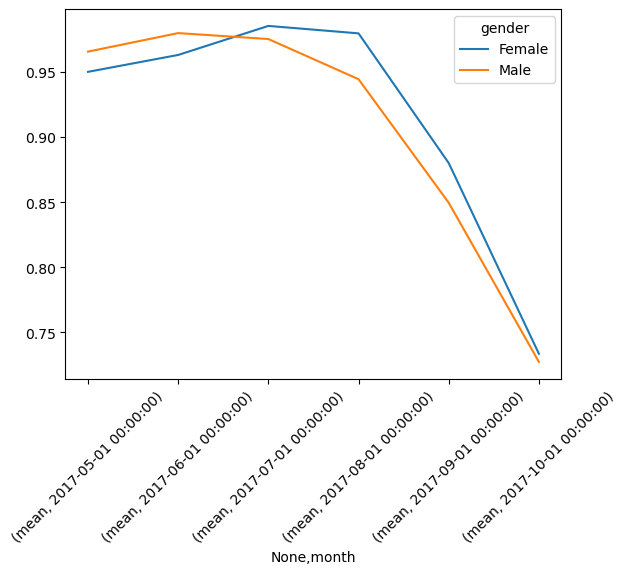

In [48]:
df.pivot_table(index='gender', columns='month', values='result_d', aggfunc=['mean']).T.plot(rot=45)

Gender is clearly not an issue.

In [49]:
df.groupby(['month', 'document_type'], dropna=False)['result_d'].agg(['count', 'mean'])

count      mean
month      document_type                          
2017-05-01 driving_licence            21  1.000000
           national_identity_card     18  0.944444
           passport                   19  0.947368
2017-06-01 driving_licence            95  0.989474
           national_identity_card     90  0.944444
           passport                   87  0.988506
           NaN                         1  0.000000
2017-07-01 driving_licence           366  0.986339
           national_identity_card    345  0.988406
           passport                  305  0.957377
           residence_permit           16  0.937500
           NaN                        96  0.000000
2017-08-01 driving_licence           328  0.969512
           national_identity_card    366  0.964481
           passport                  339  0.938053
           residence_permit           28  0.964286
           NaN                       162  0.000000
2017-09-01 driving_licence           322  0.872671
           national_identity_card    394  0.903553
           passport                  278  0.823741
           residence_permit           34  0.941176
           NaN                       215  0.004651
2017-10-01 driving_licence           553  0.763110
           national_identity_card    551  0.851180
           passport                  398  0.623116
           residence_permit           18  0.722222
           NaN                       403  0.000000

<Axes: xlabel='month'>

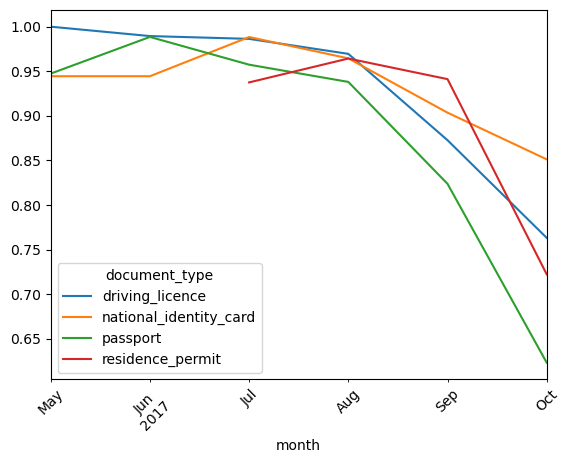

In [50]:
df.pivot_table(index='document_type', columns='month', values='result_d', aggfunc='mean').T.plot(rot=45)

The pass rate of all document types declined, but national identity cards seem to be the most resilient to this decline.

The number of NaN values in `document_type` grows from month to month, and it seems to be one of the main reasons behind the drop in the document pass rate. The pass rate of NaN documents is zero and it causes an overall pass rate decline.

Also, before breaking the data down by document types, the decline seemed gradual. Now, the decine looks like a sharp fall in the last two months.



Just to be sure, I calculate the percentage of NaN documents for each month:

In [51]:
result = df[df['document_type'].isna()].groupby('month')['result_d'].agg(['count', 'mean'])
# Get the total count of entries for each month
total_count = df.groupby('month')['result_d'].count()
# Calculate the percentage of NaN values in 'document_type' for each month
result['percentage_na'] = (result['count'] / total_count) * 100
# Rename the columns for better clarity
result = result.rename(columns={'count': 'nan_count', 'mean': 'mean_result_d'})

print(result)

            nan_count  mean_result_d  percentage_na
month                                              
2017-06-01          1       0.000000       0.366300
2017-07-01         96       0.000000       8.510638
2017-08-01        162       0.000000      13.246116
2017-09-01        215       0.004651      17.296862
2017-10-01        403       0.000000      20.956838


In [52]:
df.pivot_table(index='gender', columns='month', values='result_d', aggfunc=['mean'])

mean                                                       
month  2017-05-01 2017-06-01 2017-07-01 2017-08-01 2017-09-01 2017-10-01
gender                                                                  
Female   0.950000   0.962963   0.985240   0.979522   0.880000   0.733645
Male     0.965517   0.979730   0.975177   0.944348   0.849524   0.727395

<Axes: xlabel='None,month'>

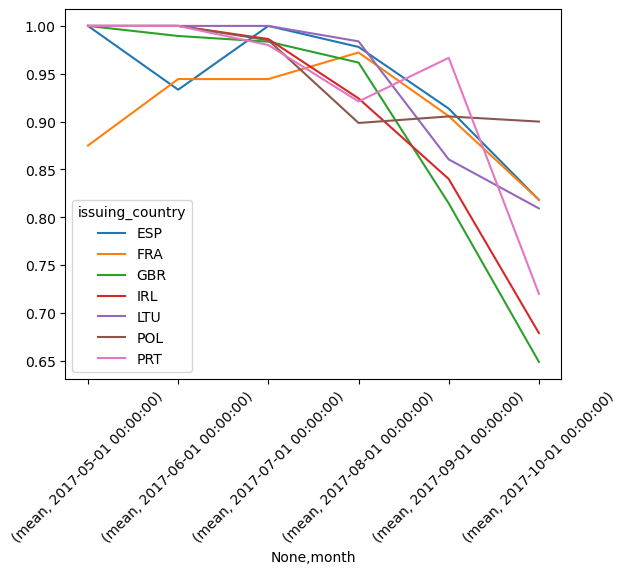

In [53]:
top_7_countries = df['issuing_country'].value_counts().head(7).index
filter_condition = df['issuing_country'].isin(top_7_countries)
df[filter_condition].pivot_table(index='issuing_country', columns='month', values='result_d', aggfunc=['mean']).T.plot(rot=45)

In [54]:
df[filter_condition].pivot_table(index='issuing_country', columns='month', values='result_d', aggfunc=['count','mean'])

count                                              \
month           2017-05-01 2017-06-01 2017-07-01 2017-08-01 2017-09-01   
issuing_country                                                          
ESP                      4         15         69         91         81   
FRA                      8         36        162        180        159   
GBR                     24         95        304        261        248   
IRL                      3         12         73         66         50   
LTU                      1         12         45         62         86   
POL                      2         11         67         69         74   
PRT                      5          6         50         38         30   

                                 mean                                   \
month           2017-10-01 2017-05-01 2017-06-01 2017-07-01 2017-08-01   
issuing_country                                                          
ESP                     66      1.000   0.933333   1.000000   0.978022   
FRA                    253      0.875   0.944444   0.944444   0.972222   
GBR                    373      1.000   0.989474   0.983553   0.961686   
IRL                    109      1.000   1.000000   0.986301   0.924242   
LTU                    194      1.000   1.000000   1.000000   0.983871   
POL                     80      1.000   1.000000   0.985075   0.898551   
PRT                     50      1.000   1.000000   0.980000   0.921053   

                                       
month           2017-09-01 2017-10-01  
issuing_country                        
ESP               0.913580   0.818182  
FRA               0.905660   0.818182  
GBR               0.814516   0.648794  
IRL               0.840000   0.678899  
LTU               0.860465   0.809278  
POL               0.905405   0.900000  
PRT               0.966667   0.720000

Poland could seem the most resilient to decline, but I don't have enough numbers to be sure. For now I can't conclude that `issuing_country` has any effect on the pass rate at all.

**Key Takeaways**

*  in the last months, the percentage of documents rejected due to the insufficient quality increased from 0% to 20%.
*  in the same last months, the percentage of documents with the caution status increased from 2% to 18%. Caution status indicates that something doesn't match, such as the provided name doesn't match with the one on the document. This could be connected with the issuficient image quality which could lead to the incorrect name recognition from the image.
*  The share of NaN values in document_type grows from month to month, and it seems to be one of the main reasons behind the drop in the document pass rate, because the pass rate of NaN documents is zero.

It's unclear whether providing images of insufficient quality leads to the growth of NaN values in `document_type`, or vice versa, or if they are connected at all. This needs to be studied further, but I'm not provided with the data to do it.